# &#x1F4DC; Lecture 1

Small-scale multipath fading is more relevant to the design of reliable and efficient communication systems - The focus of the book (Fundamental of WIRELESS COMMUNICATION)

### &#x274D; Communication (Simplistic View)

<img src=images/lecture-1_Simplistic-View.png width='30%' height='30%' ></img>

Transmitted sinusoid: $x(t) = \cos(2 \pi \mathcal{f} t) $ where :
- $ \mathcal{f} $ is frequency $\approx 1 \to 4 $ Ghz
- $ t $ is time

In [1]:
using Plots
using LaTeXStrings

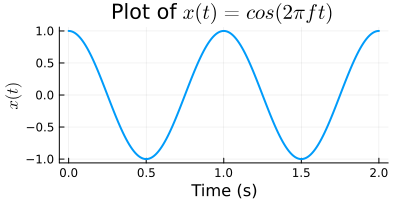

In [2]:
# Define parameters
𝑓 = 1 # frequency in Hz
t = 0:0.01:2 # time vector from 0 to 2 seconds with a step of 0.01

# Define the function
x(t) = cos(2π * 𝑓 * t)

# Plot
plot(t, x.(t), xlabel="Time (s)", ylabel=L"x(t)", title="Plot of " * L"x(t) = cos(2πft)", lw=2, size = (400,200), legend=:none)

Response to $x(t)$, expressed in the `electric far field` at time $t$:

$$
\text{Rx: } E(f, t, r, \theta, \psi) = \frac{1}{r} \cdot \alpha_s(\theta, \psi, f) \cdot \cos\left( 2 \pi f \left( t - \frac{r}{c} \right) \right)
$$


This form highlights the main components:
- **$ \frac{\alpha_s(\theta, \psi, f)}{r} $**: The combined effect of distance-based attenuation and directional gain.
- **$ \cos\left( 2 \pi f \left( t - \frac{r}{c} \right) \right) $**: The oscillating signal with a phase delay due to propagation time.

- $ \alpha $: antenna losses
- $ \frac{r}{c} $: delay due to signal


### &#x274D; Consider Movement

The handwritten note contains the following derivation and explanations:

1. **Equation for $ E(f, t, r(t)) $**:
   $
   E(f, t, r(t)) = \frac{\alpha_s}{r(t)} \cos \left( 2 \pi f \left( t - \frac{r(t)}{c} \right) \right)
   $
   - Where $ r $ is now a function of time, $ r(t) $.

2. **Simplification**:
   $
   = \frac{\alpha_s}{r_0 + v \cdot t} \cos \left( 2 \pi f \left( t - \frac{r_0}{c} - \frac{v \cdot t}{c} \right) \right)
   $
   - Here, $ r(t) $ is expanded as $ r_0 + v \cdot t $, where $ r_0 $ is the initial distance and $ v $ is the relative velocity.

3. **Further Simplification**:
   $
   = \frac{\alpha_s}{r_0 + v \cdot t} \cos \left( 2 \pi f \left[ t \left( 1 - \frac{v}{c} \right) - \frac{r_0}{c} \right] \right)
   $

4. **Concept of Effective Frequency**:
   - Effective frequency change:
     $
     f t \rightarrow f \left( 1 - \frac{v}{c} \right) \cdot t
     $
   - This implies that the frequency $ f $ is effectively reduced to $ f \left( 1 - \frac{v}{c} \right) $.

5. **Frequency Reduction**:
   - The effective frequency becomes:
     $
     f \rightarrow f \left( 1 - \frac{v}{c} \right)
     $
   - This is related to the **Doppler shift**.

6. **Doppler Shift**:
   - The Doppler shift $ D $ is given by:
     $
     D = -\frac{f v}{c}
     $

7. **Final Expression**:
   $
   E(f, t, r(t)) = \frac{\alpha_s}{r_0 + v \cdot t} \cos \left( 2 \pi f \left( t \left( 1 - \frac{v}{c} \right) - \frac{r_0}{c} \right) \right)
   $
   - Note: The time is now modified due to the relative motion.
   - Note: $\frac{\alpha_s}{r_0 + v \cdot t}$ Not LTI now.

This derivation shows how the received electric field $ E $ is affected by the relative velocity $ v $ between the transmitter and receiver, resulting in a Doppler shift in frequency. The frequency observed at the receiver is reduced by a factor of $ \left( 1 - \frac{v}{c} \right) $ due to the relative motion, a characteristic effect of the Doppler phenomenon.

### &#x274D; Fixed Tx, Fixed Rx, Perfectly Reflecting Wall

<img src=images/lecture-1_fixed-TXRX_reflecting_wall.png width='50%' height='50%'> </img>

A diagram shows a transmitter (Tx), receiver (Rx), and a perfectly reflecting wall with two paths: one direct and one reflected.

1. **Field Equation**:
   - $ E_r(f, t) = \frac{\alpha}{r} \cos \left( 2 \pi f \left( t - \frac{r}{c} \right) \right) - \frac{\alpha}{2d - r} \cos \left( 2 \pi f \left( t - \frac{2d - r}{c} \right) \right) $
   - Here, $ r $ is the distance of the direct path, and $ 2d - r $ is the distance of the reflected path.

2. **Ray Tracing Method**:
   - Use ray tracing to consider the **dominant (main) paths**.

3. **Superposition**:
   - The received field is the **superposition (addition) of two sinusoids with different phases**.
   - This can cause a **possible effect of cancellation**.

4. **Phase Shift**:
   - Phase shift calculation: 
     $
     \Delta \phi = \frac{2 \pi f (2d - r)}{c} + \pi - 2 \pi f \frac{t}{c}
     $
   - The $ \pi $ phase shift occurs in the electric field of an EM wave when reflected from an optically denser medium. This phase shift can **cause the waves to cancel each other out near the wall**.

---

This note explains how the electric field at the receiver $ E_r $ is the result of two paths: the direct path and the reflected path. The reflected path introduces a phase shift, which, due to superposition, may lead to constructive or destructive interference, potentially canceling out the signal near the reflecting wall.

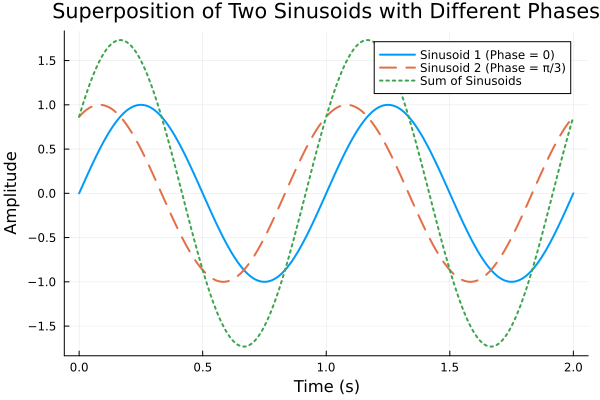

In [9]:
using Plots

# Define parameters
𝑓  = 1.0          # Frequency in Hz
ω₀ = 2π * 𝑓    # Angular frequency in rad/s
t  = 0:0.01:2     # Time vector from 0 to 2 seconds with a 0.01 s step

# Define two sinusoids with different phases
A₁ = 1.0                     # Amplitude of the first sinusoid
A₂ = 1.0                     # Amplitude of the second sinusoid
ϕ₁ = 0.0                     # Phase of the first sinusoid in radians \phi
ϕ₂ = π / 3               # Phase of the second sinusoid in radians

# Create the sinusoidal signals
y₁(t) = A₁ * sin.(ω₀ * t .+ ϕ₁)
y₂(t) = A₂ * sin.(ω₀ * t .+ ϕ₂)

# Add the two sinusoids
y₊ = y₁.(t) .+ y₂(t)

# Plot the results
plot(t, y₁.(t), label="Sinusoid 1 (Phase = 0)", lw=2)
plot!(t, y₂.(t), label="Sinusoid 2 (Phase = π/3)", lw=2, linestyle=:dash)
plot!(t, y₊, label="Sum of Sinusoids"
    , xlabel = "Time (s)", ylabel = "Amplitude"
    , title = "Superposition of Two Sinusoids with Different Phases"
    , lw=2, linestyle=:dot
)

---

# References

$$
E(f, t, r, \theta, \psi) = \frac{1}{r} \cdot \alpha_s(\theta, \psi, f) \cdot \cos\left( 2 \pi f \left( t - \frac{r}{c} \right) \right)
$$

This equation represents the received electric field $ E $ from a signal source at a distance $ r $ from the receiver. The formula takes into account several factors including distance, angle of arrival, frequency, and signal delay due to propagation time.

Breaking down each term:

- **$ E(f, t, r, \theta, \psi) $**: The electric field strength at the receiver as a function of frequency $ f $, time $ t $, distance $ r $, and angles $ \theta $ and $ \psi $ (likely representing azimuth and elevation or other directional parameters).
  
- **$ \frac{1}{r} $**: This represents the attenuation due to the distance $ r $ from the source, assuming spherical spreading where the field strength decreases as $ 1/r $ with distance.

- **$ \alpha_s(\theta, \psi, f) $**: This factor represents the antenna gain pattern and signal strength at the receiver. It depends on the direction (angles $ \theta $ and $ \psi $) and frequency $ f $, capturing how the antenna gain varies with direction and frequency.

- **$ \cos\left( 2 \pi f \left( t - \frac{r}{c} \right) \right) $**: This term describes the oscillatory nature of the electromagnetic wave, where:
  - $ f $ is the frequency of the signal,
  - $ t $ is the time variable,
  - $ \frac{r}{c} $ is the delay due to the finite speed of light $ c $. 

The term $ t - \frac{r}{c} $ accounts for the time it takes for the signal to travel the distance $ r $, introducing a phase delay in the received wave.

### Interpretation
This expression models the electric field of a received signal from a distant transmitter, factoring in attenuation over distance, the directional characteristics of the antenna, and the time delay due to signal travel. It's a standard way to describe the received signal in scenarios involving free-space propagation with directional antennas, commonly used in fields like wireless communication and radar.



---

In the context of the link budget equation or received power calculation, $ \alpha $ is often a composite factor that incorporates various parameters affecting the transmission and reception of electromagnetic waves. Let's break down what $ \alpha $ might typically include and how it can be expressed:

### 1. **Antenna Gains** ($ G_{\text{Tx}} $ and $ G_{\text{Rx}} $)
   - The gains of the transmitting and receiving antennas are crucial factors in determining the effective power transfer. Antenna gain describes how effectively an antenna can radiate or receive power in a particular direction compared to an isotropic radiator (an idealized antenna that radiates equally in all directions).
   - If both the transmitting and receiving antennas have directional gains, $ \alpha $ might include these terms as:
     $
     \alpha = G_{\text{Tx}} G_{\text{Rx}}
     $
   - $ G_{\text{Tx}} $ is the gain of the transmitting antenna, and $ G_{\text{Rx}} $ is the gain of the receiving antenna.

### 2. **Path Loss Factor** (including **wavelength** or **frequency** dependency)
   - In free-space propagation, the received power is also affected by the wavelength $ \lambda $ (or equivalently, the frequency $ f $). The **Friis transmission formula** in free space includes a term that is proportional to $ \left( \frac{\lambda}{4 \pi r} \right)^2 $.
   - This factor is often included in $ \alpha $ as:
     $
     \alpha = \frac{\lambda^2}{(4 \pi)^2} G_{\text{Tx}} G_{\text{Rx}}
     $
   - Since $ \lambda = \frac{c}{f} $, where $ c $ is the speed of light, this factor implies that $ \alpha $ will depend on the frequency, which is essential in calculating the received power at different operating frequencies.

### 3. **Antenna Losses** ( $ L $ or **Efficiency $ \eta $**)
   - Real antennas are not perfectly efficient, meaning they have losses due to material properties, impedance mismatches, and other inefficiencies. These losses are often represented by a factor $ L $, which reduces the effective gain of each antenna.
   - In terms of efficiency $ \eta $, where $ \eta $ is the fraction of power actually radiated or received:
     $
     \alpha = \eta_{\text{Tx}} G_{\text{Tx}} \cdot \eta_{\text{Rx}} G_{\text{Rx}}
     $
   - Alternatively, if $ L $ represents the combined losses in the system, $ \alpha $ might be expressed as:
     $
     \alpha = \frac{G_{\text{Tx}} G_{\text{Rx}}}{L}
     $

### 4. **Environmental and Propagation Losses**
   - Depending on the propagation environment, $ \alpha $ may also account for additional losses due to obstacles, reflections, refraction, and scattering. These losses can vary significantly in non-line-of-sight (NLOS) conditions or in environments with high multipath effects.
   - In complex models, $ \alpha $ might be adjusted with empirical factors or measured data to reflect these environmental impacts. For instance, urban or indoor environments might include an extra path loss exponent, adjusting $ \alpha $ accordingly.

### Summary
Putting it all together, $ \alpha $ is typically a combined factor that could look like:

$
\alpha = \frac{\lambda^2}{(4 \pi)^2} \frac{G_{\text{Tx}} G_{\text{Rx}}}{L}
$

or, incorporating efficiencies:

$
\alpha = \eta_{\text{Tx}} \eta_{\text{Rx}} \frac{\lambda^2}{(4 \pi)^2} G_{\text{Tx}} G_{\text{Rx}}
$

In this way, $ \alpha $ encapsulates the **gains, losses, efficiency, wavelength dependency,** and potentially **environmental factors** affecting the received power. It’s a useful simplification in link budget calculations to account for all these parameters in a single term.